# K- Means Algorithm

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn.datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('winequality-red.csv', sep=';')
data.head(10)

,"fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality"
0,"7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5"
1,"7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5"
2,"7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,..."
3,"11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58..."
4,"7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5"
5,"7.4,0.66,0,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5"
6,"7.9,0.6,0.06,1.6,0.069,15,59,0.9964,3.3,0.46,9..."
7,"7.3,0.65,0,1.2,0.065,15,21,0.9946,3.39,0.47,10,7"
8,"7.8,0.58,0.02,2,0.073,9,18,0.9968,3.36,0.57,9.5,7"
9,"7.5,0.5,0.36,6.1,0.071,17,102,0.9978,3.35,0.8,..."


In [3]:
data.shape

(1599, 1)

In [4]:
data.describe()

,"fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality"
count,1599
unique,1359
top,"7.5,0.51,0.02,1.7,0.084,13,31,0.99538,3.36,0.5..."
freq,4


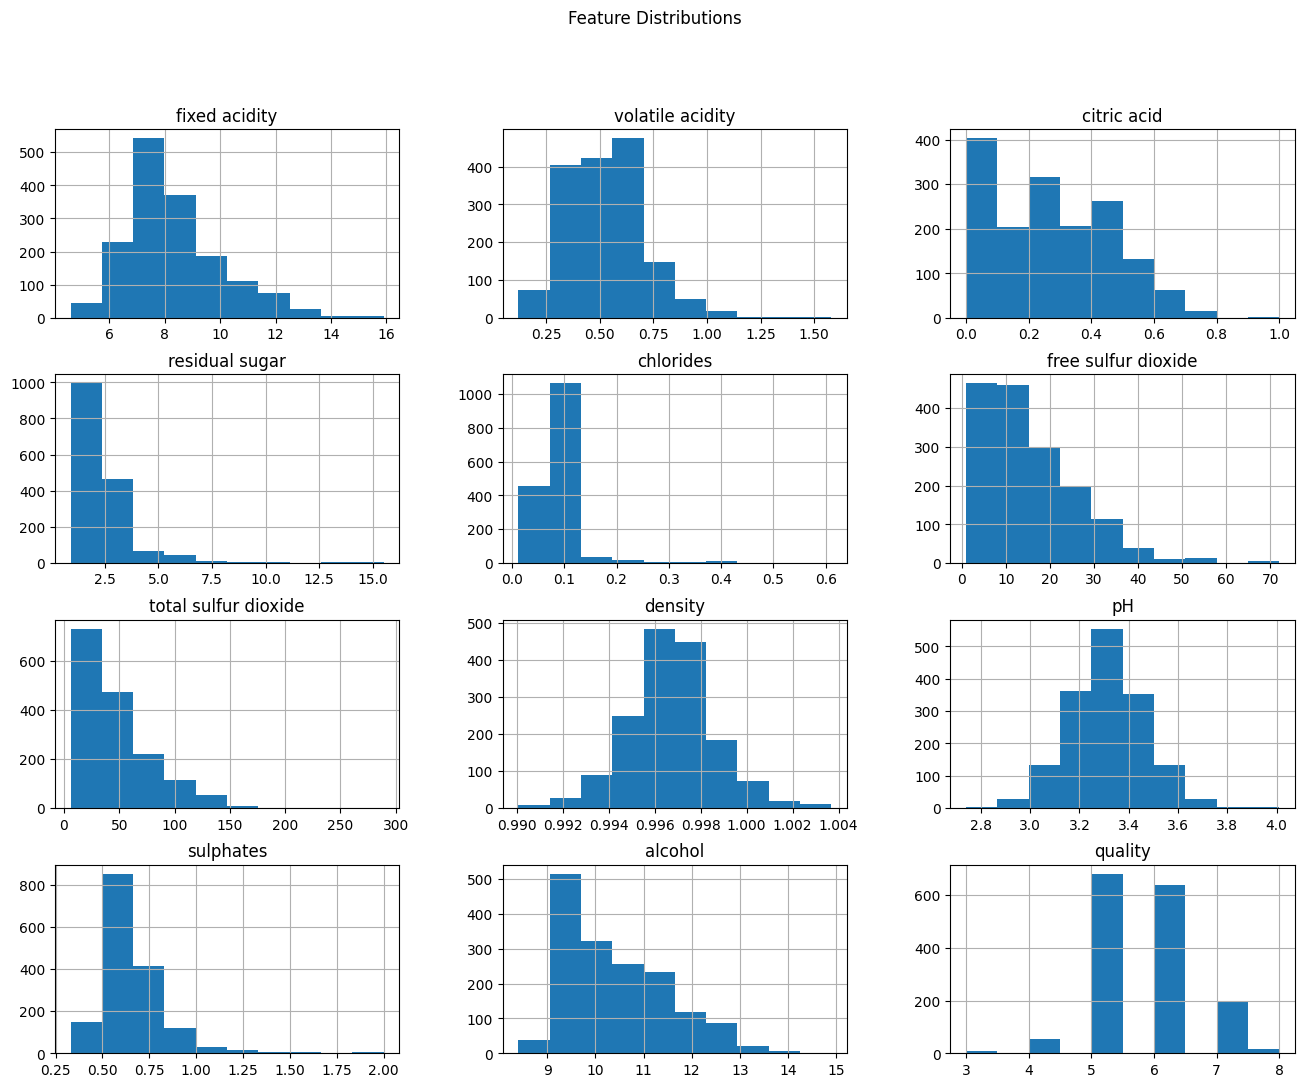

In [5]:
# Split the columns into separate ones
data = data['fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality'] \
	.str.split(',', expand=True)
data.columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
				'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

# Convert columns to numeric for plotting
data = data.apply(pd.to_numeric, errors='coerce')

# Plot histograms
data.hist(figsize=(16, 12))
plt.suptitle("Feature Distributions")
plt.show()

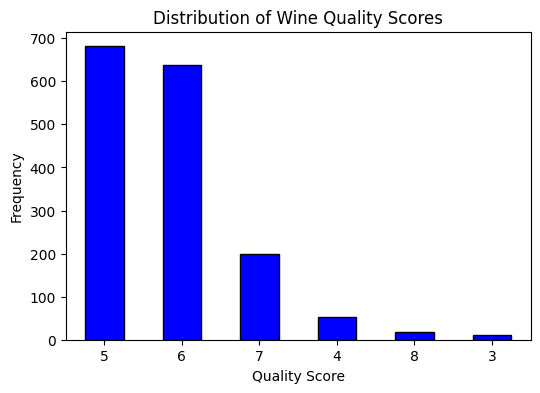

In [6]:
# Bar plot: Distribution of wine quality scores
plt.figure(figsize=(6, 4))
data["quality"].value_counts().plot(kind="bar", color="b", edgecolor="black")
plt.title("Distribution of Wine Quality Scores")
plt.xlabel("Quality Score")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()

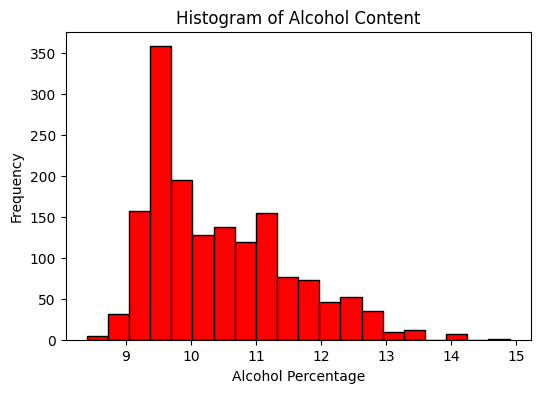

In [7]:
# Histogram of alcohol content
plt.figure(figsize=(6, 4))

data["alcohol"].plot(kind="hist", bins=20, edgecolor="black", color= "r")
plt.title("Histogram of Alcohol Content")
plt.xlabel("Alcohol Percentage")
plt.ylabel("Frequency")
plt.show()

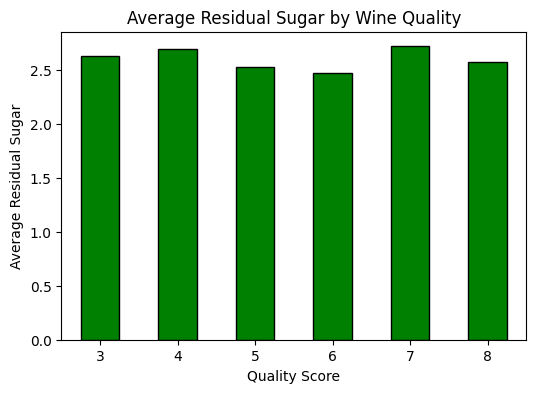

In [8]:
# Bar Plot of Average Residual Sugar by Quality
plt.figure(figsize=(6, 4))
data.groupby("quality")["residual sugar"].mean().plot(kind="bar", color="green", edgecolor = "black")
plt.title("Average Residual Sugar by Wine Quality")
plt.xlabel("Quality Score")
plt.ylabel("Average Residual Sugar")
plt.xticks(rotation=0)
plt.show()

In [9]:
# Removing quality because K-Means is an unsupervised algorithm and does not use target labels, this label can lead to bias in the clustering process
# Feature set
feature_set = data.drop("quality", axis=1)
feature_set.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [10]:
# Label set
label_set = data["quality"]
label_set

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [11]:
# Initialize KMeans with chosen number of clusters
km_clustering = KMeans(n_clusters=4, random_state= 5, verbose=1)

In [12]:
# Fit the model using the scaled features
cls_model = km_clustering.fit(feature_set)  # no labels because unsupervised
cls_model

Initialization complete
Iteration 0, inertia 365313.8723706328.
Iteration 1, inertia 325005.4607985856.
Iteration 2, inertia 304795.0771246194.
Iteration 3, inertia 297042.17575305933.
Iteration 4, inertia 292328.1935390449.
Iteration 5, inertia 288890.55508870253.
Iteration 6, inertia 286912.61160168884.
Iteration 7, inertia 286034.0712881888.
Iteration 8, inertia 285279.33388995525.
Iteration 9, inertia 284697.94342066435.
Iteration 10, inertia 284555.7362371909.
Iteration 11, inertia 284509.94451390114.
Iteration 12, inertia 284473.1212791265.
Iteration 13, inertia 284421.89134602767.
Iteration 14, inertia 284292.9287428369.
Iteration 15, inertia 284213.20424701594.
Iteration 16, inertia 284141.9935443989.
Iteration 17, inertia 284078.49514511495.
Iteration 18, inertia 284026.5724401195.
Iteration 19, inertia 283937.25171419285.
Iteration 20, inertia 283819.15770119743.
Iteration 21, inertia 283782.6331971303.
Iteration 22, inertia 283773.41886373557.
Iteration 23, inertia 283766.27

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,1
,random_state,5
,copy_x,True
,algorithm,'lloyd'


In [13]:
# return the predicted labels
cls_predicted_labels = cls_model.labels_  
cls_predicted_labels

array([1, 2, 2, ..., 2, 2, 2], shape=(1599,), dtype=int32)

In [14]:
centroids = cls_model.cluster_centers_  
centroids

array([[8.02962963e+00, 5.62469136e-01, 3.16790123e-01, 3.34567901e+00,
        8.94444444e-02, 3.13641975e+01, 1.35407407e+02, 9.97114444e-01,
        3.23395062e+00, 6.94320988e-01, 9.79506173e+00],
       [8.53487110e+00, 5.21085482e-01, 2.71831750e-01, 2.38107191e+00,
        8.37815468e-02, 8.47218453e+00, 2.09402985e+01, 9.96628996e-01,
        3.30651289e+00, 6.47381275e-01, 1.05969697e+01],
       [8.17695238e+00, 5.21657143e-01, 2.56780952e-01, 2.40266667e+00,
        9.07961905e-02, 1.96466667e+01, 4.88419048e+01, 9.96737771e-01,
        3.33017143e+00, 6.73142857e-01, 1.03968254e+01],
       [8.08437500e+00, 5.48886719e-01, 2.83125000e-01, 3.01679687e+00,
        9.06210937e-02, 2.45507812e+01, 8.69492188e+01, 9.96987383e-01,
        3.30968750e+00, 6.46953125e-01, 1.01744141e+01]])

In [15]:
cls_model.inertia_

283766.2766518122

## DBSCAN Clustering
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is an unsupervised clustering algorithm that groups together points that are closely packed and marks points that lie alone in low-density regions as outliers.

Let's apply DBSCAN to our wine dataset.

In [16]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt




In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(feature_set)

In [18]:
dbscan = DBSCAN(eps=3, min_samples=1)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [19]:
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Number of clusters found: {n_clusters}")

Number of clusters found: 18


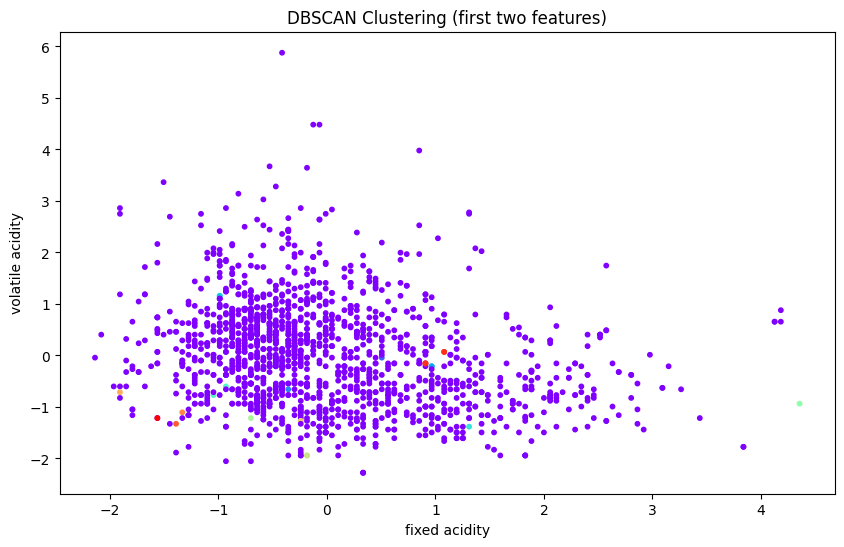

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=dbscan_labels, cmap='rainbow', s=10)
plt.title('DBSCAN Clustering (first two features)')
plt.xlabel(feature_set.columns[0])
plt.ylabel(feature_set.columns[1])
plt.show()

In [21]:
# Gaussian Mixture Model (GMM) Clustering
from sklearn.mixture import GaussianMixture


In [22]:
gmm = GaussianMixture(n_components=14, random_state=422)
gmm_labels = gmm.fit_predict(X_scaled)

print(f"Number of clusters (components): {gmm.n_components}")

Number of clusters (components): 14


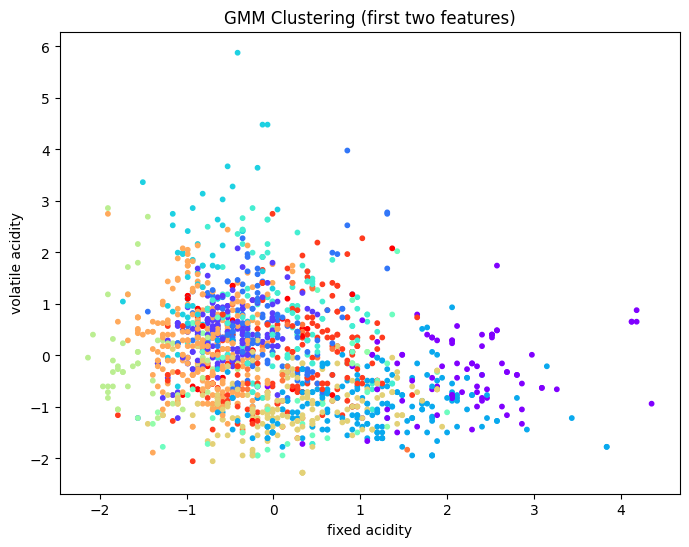

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=gmm_labels, cmap='rainbow', s=10)
plt.title('GMM Clustering (first two features)')
plt.xlabel(feature_set.columns[0])
plt.ylabel(feature_set.columns[1])
plt.show()